## Observations and Insights 

We do not know the full extent of the data in this study and the various graphs created on particular sections of this dataset do not provide much insight into any kind of general conclusion(s) for the study.  There are still a few conclusions to be made on the data we worked with in this assignment.

Based on the scatter plot of Avg Tumor Volume per Mouse Weight, there is an positive correlation between the weight of the mouse and the size of the tumor.  The larger the mouse, the larger the tumor volume in general.  This is further shown in the linear regression exercise performed on the scatter plot and the correlation value calculated for that line.

Capomulin and Ramicane are the two drugs with the most measurements taken based on the bar graphs created.  Compared to the other eight drug regimens, these two drugs have approximately 100 more measurements taken.  The average tumor volumes shown in the statistics tables and the quartiles, IQR and upper and lower bounds shown in the boxplots are lower than all the other drugs by a fair margin.  Two potential conclusions could be drawn from these observations.

One interpretation for why the average tumor volumes and quartiles values are lower for Capomulin and Ramicane compared to the other eight drug regimens is because they have approximately 100 more measurements taken.  The final tumor volumes across all drugs could be consistent, but the larger amount of measurements for Capomulin and Ramicane causes the difference in values.

The other interpretation for these observations is that Capomulin and Ramicane are the more successful drugs in reducing the size of the tumors.  This could potentially be why there are about 100 more measurements taken with these two drugs.  While the study was being conducted, the potency of Capomulin and Ramicane may have been noticed and so more measurements were taken for these two drugs to try to find consistency.  Using the line graph that showed the tumor volume over timepoint for mice treated with Capomulin, a handful of the data for those mice were viewed and a majority of the graphs did show a decrease in tumor volume.  This potentially shows that Capomulin is one of the more effective drug regimens.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files

mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

data_combine = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview

data_combine

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

num_mice = len(data_combine['Mouse ID'].unique())
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice = data_combine[data_combine.duplicated(['Mouse ID','Timepoint'], keep = False)]

In [4]:
# Get all the data for the duplicate mouse ID. 

dup_mouse_list = dup_mice['Mouse ID'].unique()

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

for mouse in dup_mouse_list:
    cleaned_data = data_combine.drop(data_combine.index[data_combine['Mouse ID'] == mouse], inplace = False)

In [6]:
# Checking the number of mice in the clean DataFrame.
# Seems there was only one duplicated Mouse ID.

cleaned_mice = len(cleaned_data['Mouse ID'].unique())
cleaned_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Using groupby and statistical methods to find the needed values for the data rounded to two decimal places.

drugs_group_mean = round(cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),2)
drugs_group_median = round(cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),2)
drugs_group_std = round(cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),2)
drugs_group_var = round(cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),2)
drugs_group_sem = round(cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem(),2)

# Merged the first three statistics together.

drug_combine = pd.merge(drugs_group_mean, drugs_group_median, on = 'Drug Regimen')
drug_combine_two = pd.merge(drug_combine, drugs_group_var, on = 'Drug Regimen')

# Renamed columns to be more descriptive and accurate.

drug_combine_two_renamed = drug_combine_two.rename(columns={'Tumor Volume (mm3)_x' : 'Mean Tumor Volume (mm3)',
                                                            'Tumor Volume (mm3)_y' : 'Median Tumor Volume (mm3)',
                                                            'Tumor Volume (mm3)' : 'Variance Tumor Volume (mm3)'})

# Merged the remaining statistics into one summary table.

drug_combine_three = pd.merge(drug_combine_two_renamed, drugs_group_std, on = 'Drug Regimen')
drug_combine_all = pd.merge(drug_combine_three, drugs_group_sem, on = 'Drug Regimen')

# Renamed the remaining columns to be more descriptive and accurate.

all_drugs_renamed = drug_combine_all.rename(columns={'Tumor Volume (mm3)_x' : 'Std Deviation Tumor Volume (mm3)',
                                                     'Tumor Volume (mm3)_y' : 'SEM Tumor Volume (mm3)'})
all_drugs_renamed

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# Aggregation method help from https://stackoverflow.com/questions/53781634/aggregation-in-pandas provided
# by classmate Jenny Randle in Slack chat.  Formatted to two decimal places.

one_line_stat =(cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([('Mean Tumor Volume (mm3)','mean'), ('Median Tumor Volume (mm3)','median'), ('Variance Tumor Volume (mm3)', 'var'), ('Std Deviation Tumor Volume (mm3)', 'std'), ('SEM Tumor Volume (mm3)', 'sem')])).style.format('{0:,.2f}')
one_line_stat                 

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

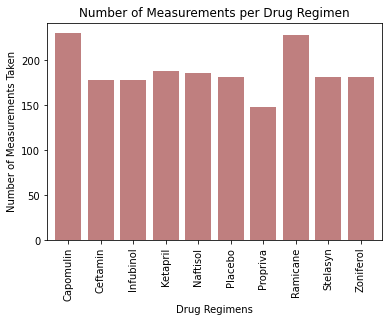

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Grouped data by Drug Regimen and used count method in order to find the number of measurements (Mouse IDs) performed for
# each of the drug regimens.  Called the count of Mouse IDs to be used for plotting.

clean_group = cleaned_data.groupby('Drug Regimen').count()
clean_group_needed = clean_group[['Mouse ID']]

# Created bar graph using Pandas to show the number of measurements taken per Drug Regimen.
# Due to confusion between rubric and instructions, a picture of the expected graph for this exercise was shown.
# The expected graph had the number of measurements taken per Drug Regimen sorted in descending order.
# Bar graph not sorted in that way below because the sorting makes the graph less interesting.

clean_group_needed.plot(kind="bar", color = 'maroon', legend = False, alpha = 0.5, width = 0.8)

# Titled graph and labeled x and y axes.

plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements Taken")

plt.show()

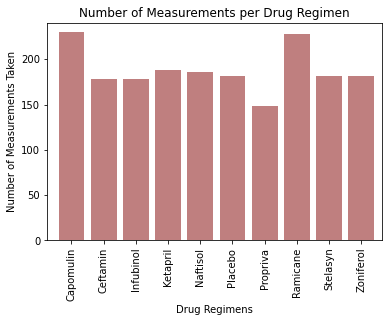

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# X-axis defined as the index values for the grouped data set from above, which is Drug Regimen, into a list.
# Y-axis defined as the count of Mouse IDs in grouped data set from above.

x_axis = clean_group.index.to_list()
y_axis = clean_group['Mouse ID'].to_list()

# Using PyPlot, created the same bar graph of Number of Measurements taken per Drug Regimen above.
# Due to confusion between rubric and instructions, a picture of the expected graph for this exercise was shown.
# The expected graph had the number of measurements taken per Drug Regimen sorted in descending order.
# Bar graph not sorted in that way below because the sorting makes the graph less interesting.

plt.bar(x_axis, y_axis, color='maroon', alpha=0.5, align='center')

# Set limits to the x and y axes based on the data, and rotated the drug labels to 90 degrees for readablility.

plt.xticks(x_axis, rotation = 90)
plt.xlim(-0.75, len(x_axis) - 0.35)
plt.ylim(0, max(y_axis)+10)

# Titled graph and labeled x and y axes.

plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements Taken")

plt.show()

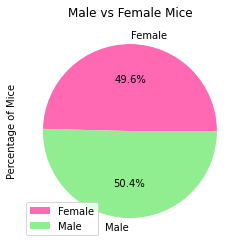

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Created a dataframe with the two columns needed for creating this graph, then dropped duplicate Mouse IDs.
# Took a count of the resulting data set grouped by the Sex of the mice to find the number of mice for each gender.

mouse_groups_gender = cleaned_data[['Sex','Mouse ID']]
mouse_groups_gender_drop = mouse_groups_gender.drop_duplicates(subset = 'Mouse ID', keep = 'first', inplace = False)
mouse_gender = mouse_groups_gender_drop.groupby('Sex').count()

# Created a pie graph using Pandas to show the comparison of male and female mice.

mouse_pie = mouse_gender.plot(kind='pie', y = 'Mouse ID', title='Male vs Female Mice', autopct='%1.1f%%', colors = ['hotpink', 'lightgreen'])

# Labeled the percentages and assigned a legend.

mouse_pie.set_ylabel('Percentage of Mice')
mouse_pie.legend(loc = 'lower left')

plt.show()

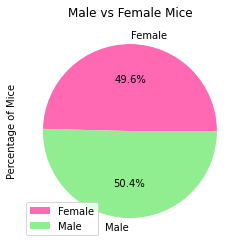

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Assigned the labels for the chart as the index of the data set grouped by Sex and counted above.

labels = mouse_gender.index

# Using PyPlot, created the same pie chart above showing the comparison between male and female mice in the study.

plt.pie(mouse_gender['Mouse ID'], labels = labels, autopct='%1.1f%%', colors = ['hotpink', 'lightgreen'])

# Titled the graph, Labeled the percentages and assigned a legend.

plt.title('Male vs Female Mice')
plt.ylabel('Percentage of Mice')
plt.legend(loc = 'lower left')

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Sorted the data by Mouse ID and Timepoint in descending order so the latest timepoint would be the first entry
# for each Mouse ID.  Dropped duplicates by Mouse ID so that the latest timepoint for each Mouse ID remained.
# Resorted the data in ascending order for personal perferences sake.

cleaned_data_sorted = cleaned_data.sort_values(['Mouse ID', 'Timepoint'], ascending=False)
cleaned_data_sorted_drop = cleaned_data_sorted.drop_duplicates(subset = 'Mouse ID', keep = 'first', inplace = False)
cleaned_data_resorted = cleaned_data_sorted_drop.sort_values('Mouse ID', ascending=True)
cleaned_data_resorted

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
1862,z435,Propriva,Female,12,26,10,48.710661,0
84,z578,Ramicane,Male,11,16,45,30.638696,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [33]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Loop through the created list of Drug Regimens requested, if that drug is found in the larger data set, take the
# Tumor Volume and add it to a list.  Then append that list for each of the four requested drugs into the empyt tumor volume
# created prior to the loop, creating a list of lists.

for drug in treatments:
    current_drug = cleaned_data_resorted[cleaned_data_resorted['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_vol.append(current_drug.to_list())
    
    # Setting quartiles to be caluclated for each of the four requested drug regimens.
    
    quartiles = current_drug.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    # Calculate the IQR and the upper and lower bounds to determine what values could be outliers for each drug regimen.
    
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Print a summary of the quartiles, IQR, and bounds for each of the requested drugs.
    
    print(f'Drug Summary for {drug}')
    print('-----------------------------------')
    print(f'The lower quartile of {drug} is: {lowerq:.2f}')
    print(f'The upper quartile of {drug} is: {upperq:.2f}')
    print(f'The interquartile range of {drug} is: {iqr:.2f}')
    print(f'The the median of {drug} is: {quartiles[0.5]:.2f}')
    print(f'Values below {lower_bound:.2f} could be outliers.')
    print(f'Values above {upper_bound:.2f} could be outliers.')
    
    # Setting an empty string for any outliers.  This was coded last so it is assuming we
    # only have one outlier, which is true.
    
    outlier = ''
    
    # Looping through the values being put into current drug list, checking to find any values above
    # or below the bounds for each drug.  If outlier found, set value equal to empty string outlier.
    
    for value in current_drug.to_list():
        if value > upper_bound or value < lower_bound:
            outlier = value
            
    # If outlier is not an empty string, print the found outlier, else print a new line for output readability.
    
    if outlier != '':
        print(f'Outlier = {outlier:.2f}\n\n')
    else:
        print('\n')

Drug Summary for Capomulin
-----------------------------------
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13
Values below 20.70 could be outliers.
Values above 51.83 could be outliers.


Drug Summary for Ramicane
-----------------------------------
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.10
The the median of Ramicane is: 36.56
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


Drug Summary for Infubinol
-----------------------------------
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
Outlier = 36.32


Drug Summary for Ceftamin
-----------------------------------

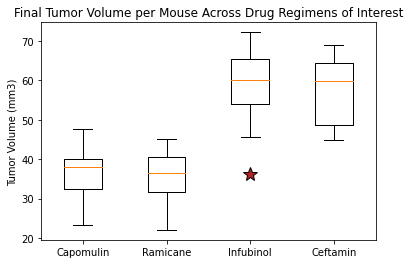

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Defining how to display any outliers in the data.

outliers = dict(markerfacecolor='firebrick', marker='*', markersize=15)

# Setting up a plot that will hold all four of the resulting boxplots from the earlier loop.

fig1, ax1 = plt.subplots()

# Setting the title and a lable for the y-axis for the four resulting boxplots.

ax1.set_title('Final Tumor Volume per Mouse Across Drug Regimens of Interest')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, flierprops = outliers, labels=treatments)


plt.show()

## Line and Scatter Plots

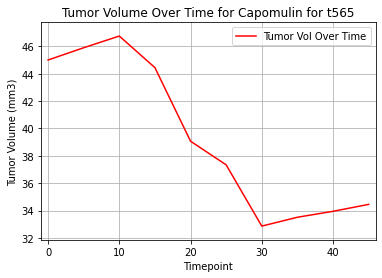

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin.

# Reorganized data set to show every Mouse ID that had been given Capomulin to know which Mouse ID's data was relevent
# to pull to generate line plot.

# Pulled all the data associated with the requested Capomulin drug regimen.  Dropped duplicates by Mouse ID to find all the
# unique mice treated with Capomulin.  Created a list of the Mouse IDs to use for later line graph.

cleaned_data_cap = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']
cleaned_data_cap_drop = cleaned_data_cap.drop_duplicates(subset='Mouse ID', keep = 'first', inplace=False)
cap_mouse = cleaned_data_cap_drop['Mouse ID'].to_list()

# Defining the y-axis as all the tumor volume values associated with a specific Mouse ID called from the list
# of mice treated with Capomulin.  Defining the x-axis as all the timepoint values associated with the same Mouse ID
# called for the list of mice treated with Capomulin.

tumors = cleaned_data.loc[cleaned_data['Mouse ID'] == cap_mouse[8]]['Tumor Volume (mm3)'].to_list()
times = cleaned_data.loc[cleaned_data['Mouse ID'] == cap_mouse[8]]['Timepoint'].to_list()

# Plotting the line graph of tumor volume over time for a particular mouse treated with Capomulin.

plt.plot(times, tumors, label='Tumor Vol Over Time', color='red')

# Titled the graph calling out the mouse whose data was called earlier, set x and y axes lables and a legend.

plt.title(f'Tumor Volume Over Time for Capomulin for {cap_mouse[8]}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='upper right')

# Set a limit to the x and y axes based on the data and added a grid to be more readable.

plt.xlim(-1, max(times)+1)
plt.ylim(min(tumors)-1, max(tumors)+1)

plt.grid()
plt.show()

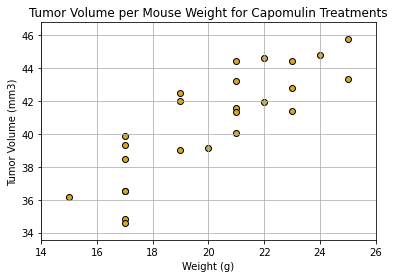

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Grouped the data for just Capomulin treated mice created earlier
# by the Mouse ID and took the mean of all values for each Mouse ID which would provide the average tumor volume
# and the weight of each mouse (which does not change throughout the dataset).

cleaned_data_cap_mean = cleaned_data_cap.groupby('Mouse ID').mean()

# Defined the y-axis as the avg tumor volume values from the previously grouped data, definied the x-axis as the weights
# called from the same grouped data set.

avg_tumors = cleaned_data_cap_mean['Tumor Volume (mm3)']
weight = cleaned_data_cap_mean['Weight (g)']

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(weight, avg_tumors, marker='o', facecolors='goldenrod', edgecolors='black')

# Titled the graph and gave labels to the x and y axes.

plt.title('Tumor Volume per Mouse Weight for Capomulin Treatments')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(weight)-1, max(weight)+1)
plt.ylim(min(avg_tumors)-1, max(avg_tumors)+1)

plt.grid()
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


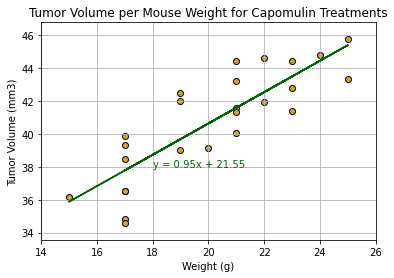

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Caluclated the correlation coefficient from the data graphed in the previous scatter plot and
# printed the value rounded to two decimal places.

correlation = st.pearsonr(weight,avg_tumors)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Caluclated the regression of the data plotted in the scatter plot and caluclated the y values using the formula
# for the slope of a line in order to plot the linear regression of the data.

regression = st.linregress(weight, avg_tumors)
y_values = weight * regression.slope + regression.intercept

# Created the same scatter plot from before together with the linear regression calculated previously.
# Created a string to print the slope equation near the linear regression line.

plt.scatter(weight, avg_tumors, marker='o', facecolors='goldenrod', edgecolors='black')
plt.plot(weight, y_values, color='darkgreen')
line_string = "y = " + str(round(regression.slope,2)) + "x + " + str(round(regression.intercept,2))
plt.annotate(line_string,(18,38),fontsize=10,color="darkgreen")

# Titled graph and set a label for the x and y axes.

plt.title('Tumor Volume per Mouse Weight for Capomulin Treatments')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Set a limit to the x and y axes based on the data, added a grid to make the graph more readable.

plt.xlim(min(weight)-1, max(weight)+1)
plt.ylim(min(avg_tumors)-1, max(avg_tumors)+1)

plt.grid()
plt.show()